In [1]:
import sys

sys.path.append(r"D:\Projects\Solar Forcasting\Functions")

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LearningAlgorithms import RegressionAlgorithms
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_pickle(
    "D:\\Projects\\Solar Forcasting\\Processed Data\\Pickle files\\feature_engineered_data.pkl"
)

In [4]:
df

,Year,Month,Day,Hour,Minute,Temperature,DNI,Relative Humidity,Wind Direction,Wind Speed,...,Sqrt_Sum_of_Squares_pse,Sqrt_Sum_of_Squares_freq_0.0_Hz_ws_14,Sqrt_Sum_of_Squares_freq_0.357_Hz_ws_14,Sqrt_Sum_of_Squares_freq_0.714_Hz_ws_14,Sqrt_Sum_of_Squares_freq_1.071_Hz_ws_14,Sqrt_Sum_of_Squares_freq_1.429_Hz_ws_14,Sqrt_Sum_of_Squares_freq_1.786_Hz_ws_14,Sqrt_Sum_of_Squares_freq_2.143_Hz_ws_14,Sqrt_Sum_of_Squares_freq_2.5_Hz_ws_14,cluster
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 08:10:00,2016,1,1,8,10,20.910921,429.706822,77.407446,11.047466,2.323796,...,9.126460e-04,15735.966711,78.671742,-35.970037,-42.955701,-46.033023,-47.394987,-48.046562,-48.317255,3
2016-01-01 08:20:00,2016,1,1,8,20,21.106520,461.545953,76.402018,11.096616,2.296683,...,1.009482e-03,15838.405384,69.777495,-43.734344,-49.247922,-51.995477,-53.224841,-53.815323,-54.061034,3
2016-01-01 08:30:00,2016,1,1,8,30,21.298230,489.335115,75.384698,11.679393,2.280430,...,1.046920e-03,15951.821196,49.989914,-49.106619,-54.872447,-57.390815,-58.526751,-59.072409,-59.299482,3
2016-01-01 08:40:00,2016,1,1,8,40,21.488361,513.816825,74.381235,12.870798,2.274983,...,1.079729e-03,16075.311965,20.957240,-52.767500,-59.920183,-62.330689,-63.409605,-63.925455,-64.139687,1
2016-01-01 08:50:00,2016,1,1,8,50,21.678054,535.816403,73.414659,14.528575,2.279102,...,1.191776e-03,16208.177984,-13.810752,-56.096128,-64.593173,-66.957572,-67.987422,-68.475668,-68.677703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:10:00,2020,12,31,23,10,20.841963,0.134269,83.098124,356.351072,2.842778,...,6.250286e-07,16217.598622,-1.259230,-1.230540,-1.064344,-1.010817,-0.987984,-0.977244,-0.972814,4
2020-12-31 23:20:00,2020,12,31,23,20,20.830940,0.175199,83.026939,356.742914,2.856379,...,6.477441e-07,16219.451413,-1.654654,-1.228184,-1.001289,-0.930935,-0.901014,-0.886961,-0.881169,4
2020-12-31 23:30:00,2020,12,31,23,30,20.820704,0.168148,82.916627,357.140470,2.870123,...,6.841334e-07,16221.092715,-2.117361,-1.167637,-0.900088,-0.818919,-0.784444,-0.768256,-0.761586,4


In [5]:
# Getting all column names that contain 'DNI'
dni_related_columns = [col for col in df.columns if "DNI" in col]

# X will contain all columns except those related to DNI
X = df.drop(columns=dni_related_columns)

# y will contain only the DNI column
y = df["DNI"]

In [6]:
X = X.resample("D").mean()
y = y.resample("D").mean()

In [ ]:
X

,Year,Month,Day,Hour,Minute,Temperature,Relative Humidity,Wind Direction,Wind Speed,Pressure,...,Sqrt_Sum_of_Squares_pse,Sqrt_Sum_of_Squares_freq_0.0_Hz_ws_14,Sqrt_Sum_of_Squares_freq_0.357_Hz_ws_14,Sqrt_Sum_of_Squares_freq_0.714_Hz_ws_14,Sqrt_Sum_of_Squares_freq_1.071_Hz_ws_14,Sqrt_Sum_of_Squares_freq_1.429_Hz_ws_14,Sqrt_Sum_of_Squares_freq_1.786_Hz_ws_14,Sqrt_Sum_of_Squares_freq_2.143_Hz_ws_14,Sqrt_Sum_of_Squares_freq_2.5_Hz_ws_14,cluster
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 08:10:00,2016,1,1,8,10,20.910921,77.407446,11.047466,2.323796,1023.933419,...,9.126460e-04,15735.966711,78.671742,-35.970037,-42.955701,-46.033023,-47.394987,-48.046562,-48.317255,3
2016-01-01 08:20:00,2016,1,1,8,20,21.106520,76.402018,11.096616,2.296683,1023.975628,...,1.009482e-03,15838.405384,69.777495,-43.734344,-49.247922,-51.995477,-53.224841,-53.815323,-54.061034,3
2016-01-01 08:30:00,2016,1,1,8,30,21.298230,75.384698,11.679393,2.280430,1024.005035,...,1.046920e-03,15951.821196,49.989914,-49.106619,-54.872447,-57.390815,-58.526751,-59.072409,-59.299482,3
2016-01-01 08:40:00,2016,1,1,8,40,21.488361,74.381235,12.870798,2.274983,1024.020595,...,1.079729e-03,16075.311965,20.957240,-52.767500,-59.920183,-62.330689,-63.409605,-63.925455,-64.139687,1
2016-01-01 08:50:00,2016,1,1,8,50,21.678054,73.414659,14.528575,2.279102,1024.024483,...,1.191776e-03,16208.177984,-13.810752,-56.096128,-64.593173,-66.957572,-67.987422,-68.475668,-68.677703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:10:00,2020,12,31,23,10,20.841963,83.098124,356.351072,2.842778,1017.937002,...,6.250286e-07,16217.598622,-1.259230,-1.230540,-1.064344,-1.010817,-0.987984,-0.977244,-0.972814,4
2020-12-31 23:20:00,2020,12,31,23,20,20.830940,83.026939,356.742914,2.856379,1017.771887,...,6.477441e-07,16219.451413,-1.654654,-1.228184,-1.001289,-0.930935,-0.901014,-0.886961,-0.881169,4
2020-12-31 23:30:00,2020,12,31,23,30,20.820704,82.916627,357.140470,2.870123,1017.551541,...,6.841334e-07,16221.092715,-2.117361,-1.167637,-0.900088,-0.818919,-0.784444,-0.768256,-0.761586,4


In [ ]:
y

datetime
2016-01-01 08:10:00    429.706822
2016-01-01 08:20:00    461.545953
2016-01-01 08:30:00    489.335115
2016-01-01 08:40:00    513.816825
2016-01-01 08:50:00    535.816403
                          ...    
2020-12-31 23:10:00      0.134269
2020-12-31 23:20:00      0.175199
2020-12-31 23:30:00      0.168148
2020-12-31 23:40:00      0.127125
2020-12-31 23:50:00      0.069719
Name: DNI, Length: 262983, dtype: float64

In [ ]:
# Dropping the 'Year', 'Month', 'Day', 'Hour', 'Minute' columns from the X DataFrame
X = X.drop(columns=["Year", "Month", "Day", "Hour", "Minute"])

# Displaying the first few rows of the updated X DataFrame
print(X.head())

                     Temperature  Relative Humidity  Wind Direction  \
datetime                                                              
2016-01-01 08:10:00    20.910921          77.407446       11.047466   
2016-01-01 08:20:00    21.106520          76.402018       11.096616   
2016-01-01 08:30:00    21.298230          75.384698       11.679393   
2016-01-01 08:40:00    21.488361          74.381235       12.870798   
2016-01-01 08:50:00    21.678054          73.414659       14.528575   

                     Wind Speed     Pressure  Dew Point     pca_1     pca_2  \
datetime                                                                      
2016-01-01 08:10:00    2.323796  1023.933419  16.834345  0.464252 -0.091751   
2016-01-01 08:20:00    2.296683  1023.975628  16.813964  0.482976 -0.060639   
2016-01-01 08:30:00    2.280430  1024.005035  16.781470  0.500255 -0.032874   
2016-01-01 08:40:00    2.274983  1024.020595  16.745428  0.516019 -0.007795   
2016-01-01 08:50:00    2.279

In [ ]:
X

,Temperature,Relative Humidity,Wind Direction,Wind Speed,Pressure,Dew Point,pca_1,pca_2,pca_3,pca_4,...,Sqrt_Sum_of_Squares_pse,Sqrt_Sum_of_Squares_freq_0.0_Hz_ws_14,Sqrt_Sum_of_Squares_freq_0.357_Hz_ws_14,Sqrt_Sum_of_Squares_freq_0.714_Hz_ws_14,Sqrt_Sum_of_Squares_freq_1.071_Hz_ws_14,Sqrt_Sum_of_Squares_freq_1.429_Hz_ws_14,Sqrt_Sum_of_Squares_freq_1.786_Hz_ws_14,Sqrt_Sum_of_Squares_freq_2.143_Hz_ws_14,Sqrt_Sum_of_Squares_freq_2.5_Hz_ws_14,cluster
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 08:10:00,20.910921,77.407446,11.047466,2.323796,1023.933419,16.834345,0.464252,-0.091751,0.614915,-0.010667,...,9.126460e-04,15735.966711,78.671742,-35.970037,-42.955701,-46.033023,-47.394987,-48.046562,-48.317255,3
2016-01-01 08:20:00,21.106520,76.402018,11.096616,2.296683,1023.975628,16.813964,0.482976,-0.060639,0.615136,-0.010246,...,1.009482e-03,15838.405384,69.777495,-43.734344,-49.247922,-51.995477,-53.224841,-53.815323,-54.061034,3
2016-01-01 08:30:00,21.298230,75.384698,11.679393,2.280430,1024.005035,16.781470,0.500255,-0.032874,0.613936,-0.008826,...,1.046920e-03,15951.821196,49.989914,-49.106619,-54.872447,-57.390815,-58.526751,-59.072409,-59.299482,3
2016-01-01 08:40:00,21.488361,74.381235,12.870798,2.274983,1024.020595,16.745428,0.516019,-0.007795,0.611141,-0.006377,...,1.079729e-03,16075.311965,20.957240,-52.767500,-59.920183,-62.330689,-63.409605,-63.925455,-64.139687,1
2016-01-01 08:50:00,21.678054,73.414659,14.528575,2.279102,1024.024483,16.713344,0.530258,0.015315,0.607081,-0.003016,...,1.191776e-03,16208.177984,-13.810752,-56.096128,-64.593173,-66.957572,-67.987422,-68.475668,-68.677703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:10:00,20.841963,83.098124,356.351072,2.842778,1017.937002,17.889407,0.289976,-0.448297,-0.188289,0.031329,...,6.250286e-07,16217.598622,-1.259230,-1.230540,-1.064344,-1.010817,-0.987984,-0.977244,-0.972814,4
2020-12-31 23:20:00,20.830940,83.026939,356.742914,2.856379,1017.771887,17.854056,0.289546,-0.448180,-0.189510,0.034663,...,6.477441e-07,16219.451413,-1.654654,-1.228184,-1.001289,-0.930935,-0.901014,-0.886961,-0.881169,4
2020-12-31 23:30:00,20.820704,82.916627,357.140470,2.870123,1017.551541,17.808415,0.288922,-0.447794,-0.190929,0.038511,...,6.841334e-07,16221.092715,-2.117361,-1.167637,-0.900088,-0.818919,-0.784444,-0.768256,-0.761586,4


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [ ]:
X_train

,Temperature,Relative Humidity,Wind Direction,Wind Speed,Pressure,Dew Point,pca_1,pca_2,pca_3,pca_4,...,Sqrt_Sum_of_Squares_pse,Sqrt_Sum_of_Squares_freq_0.0_Hz_ws_14,Sqrt_Sum_of_Squares_freq_0.357_Hz_ws_14,Sqrt_Sum_of_Squares_freq_0.714_Hz_ws_14,Sqrt_Sum_of_Squares_freq_1.071_Hz_ws_14,Sqrt_Sum_of_Squares_freq_1.429_Hz_ws_14,Sqrt_Sum_of_Squares_freq_1.786_Hz_ws_14,Sqrt_Sum_of_Squares_freq_2.143_Hz_ws_14,Sqrt_Sum_of_Squares_freq_2.5_Hz_ws_14,cluster
datetime,,,,,,,,,,,,,,,,,,,,,
2018-08-22 00:00:00,27.852412,93.231032,187.735150,3.575692,1006.391002,26.638395,-0.366168,-0.027957,0.001171,0.113285,...,1.842195e-07,15438.891280,-1.222831,0.164561,0.302076,0.341144,0.357389,0.364953,0.368060,0
2020-09-06 09:00:00,29.838028,80.073559,185.493966,1.113374,1010.998211,26.023399,-0.117030,0.205817,0.023062,-0.208075,...,5.935392e-04,16146.923978,-117.039333,-17.086431,0.532403,3.616500,4.975205,5.627140,5.898401,2
2020-03-29 05:00:00,25.108634,92.581396,73.160755,0.804073,1010.665694,23.857139,-0.202659,-0.124541,0.315627,-0.243517,...,4.327340e-04,15794.933340,-80.074960,22.058161,18.376318,19.150459,19.529802,19.717161,19.796188,5
2019-04-26 19:00:00,29.020140,76.185207,267.010846,2.348939,1009.695393,24.373941,-0.125999,-0.012758,-0.158625,-0.053551,...,8.215115e-04,15881.593160,104.868161,44.185093,33.567050,30.425925,29.064607,28.420208,28.153703,4
2019-09-07 16:00:00,28.564597,91.729746,175.141744,4.100495,1005.298559,27.085609,-0.377400,0.056598,0.017136,0.193006,...,2.586963e-06,15383.308601,5.198968,-1.520479,-1.118173,-1.039688,-1.012553,-1.000925,-0.996331,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-13 00:40:00,26.791087,82.879603,286.293122,2.082164,1011.794227,23.595845,-0.066361,-0.119665,-0.159708,-0.089098,...,8.862885e-07,15807.223807,0.223063,-1.325393,-1.353797,-1.369369,-1.376702,-1.380283,-1.381784,4
2020-12-05 13:50:00,24.710784,66.064824,24.009449,1.137206,1015.373096,17.967670,0.471575,0.316155,0.522957,-0.082589,...,1.394947e-04,18842.867514,-3.393071,19.088305,23.148174,24.566440,25.193531,25.493186,25.617641,1
2018-07-05 17:30:00,28.172766,91.915932,210.426673,2.882725,1003.752017,26.706765,-0.366913,0.020287,-0.059409,0.046273,...,2.537296e-04,15681.353379,65.183826,-2.162849,8.357251,11.879854,13.017551,13.516010,13.715429,0


In [ ]:
X_test

,Temperature,Relative Humidity,Wind Direction,Wind Speed,Pressure,Dew Point,pca_1,pca_2,pca_3,pca_4,...,Sqrt_Sum_of_Squares_pse,Sqrt_Sum_of_Squares_freq_0.0_Hz_ws_14,Sqrt_Sum_of_Squares_freq_0.357_Hz_ws_14,Sqrt_Sum_of_Squares_freq_0.714_Hz_ws_14,Sqrt_Sum_of_Squares_freq_1.071_Hz_ws_14,Sqrt_Sum_of_Squares_freq_1.429_Hz_ws_14,Sqrt_Sum_of_Squares_freq_1.786_Hz_ws_14,Sqrt_Sum_of_Squares_freq_2.143_Hz_ws_14,Sqrt_Sum_of_Squares_freq_2.5_Hz_ws_14,cluster
datetime,,,,,,,,,,,,,,,,,,,,,
2016-06-15 23:00:00,27.397466,94.470256,169.275519,2.584216,1004.986648,26.396822,-0.371179,-0.025017,0.043893,-0.000067,...,3.473102e-07,15374.523751,-1.977332,0.039025,0.202203,0.255422,0.278290,0.289079,0.293534,0
2020-03-06 02:00:00,22.824388,85.020450,312.275572,1.527626,1014.998069,20.198237,0.142248,-0.315868,-0.137519,-0.142083,...,6.140076e-06,15945.041832,-5.150144,-3.312008,-3.206816,-3.181393,-3.171269,-3.166631,-3.164739,4
2016-02-25 08:30:00,24.963818,85.622573,16.209779,1.667073,1021.001226,22.398174,0.012092,-0.125629,0.492821,-0.184683,...,4.122770e-06,15375.216547,3.865512,2.001680,-0.905045,-2.322047,-2.888161,-3.147044,-3.252557,5
2019-04-05 20:20:00,26.596000,84.921521,182.407763,1.794211,1015.545808,23.859398,-0.082623,-0.123522,0.080148,-0.157092,...,1.467165e-06,15516.315412,-1.947453,-1.446264,-1.553912,-1.568250,-1.578469,-1.584604,-1.587406,0
2020-08-28 23:10:00,27.956353,91.360477,219.549473,2.702467,1009.030374,26.403531,-0.290360,-0.037755,-0.055268,-0.017181,...,1.805747e-07,15570.478141,-1.290221,0.128867,0.243521,0.292513,0.315014,0.325911,0.330461,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-20 03:00:00,27.591664,91.478666,160.945085,2.900000,1009.020175,26.092752,-0.307325,-0.043366,0.075973,0.011825,...,7.828496e-07,15400.147485,2.844932,0.687235,0.561394,0.519587,0.501213,0.492453,0.488819,0
2017-05-02 09:30:00,29.073418,78.488807,332.023362,2.147852,1015.992772,24.950389,0.263962,0.433277,-0.223619,-0.031814,...,1.481333e-03,18056.128599,-84.913798,-81.823207,-75.214544,-73.206392,-72.345801,-71.940502,-71.773272,6
2018-11-07 12:20:00,27.977853,75.634759,10.272909,2.414957,1016.296000,23.251023,0.206745,0.469247,0.491359,0.020948,...,2.324706e-04,18477.170112,-59.931282,-26.185833,-20.544835,-18.618874,-17.769915,-17.364784,-17.196623,1


In [ ]:
y_train

datetime
2018-08-22 00:00:00      0.218652
2020-09-06 09:00:00    209.617632
2020-03-29 05:00:00     -3.900453
2019-04-26 19:00:00     -4.579044
2019-09-07 16:00:00     67.967691
                          ...    
2018-04-13 00:40:00     -0.191600
2020-12-05 13:50:00    686.014911
2018-07-05 17:30:00     21.950324
2018-10-17 10:40:00    742.962891
2018-04-27 11:10:00    629.620248
Name: DNI, Length: 197237, dtype: float64

In [ ]:
y_test

datetime
2016-06-15 23:00:00     -0.087764
2020-03-06 02:00:00     -0.096306
2016-02-25 08:30:00     90.418851
2019-04-05 20:20:00     -0.802814
2020-08-28 23:10:00     -0.281069
                          ...    
2016-06-20 03:00:00     -1.021496
2017-05-02 09:30:00    677.498800
2018-11-07 12:20:00    706.003577
2018-04-29 21:50:00      0.309519
2016-05-27 23:30:00      0.065839
Name: DNI, Length: 65746, dtype: float64

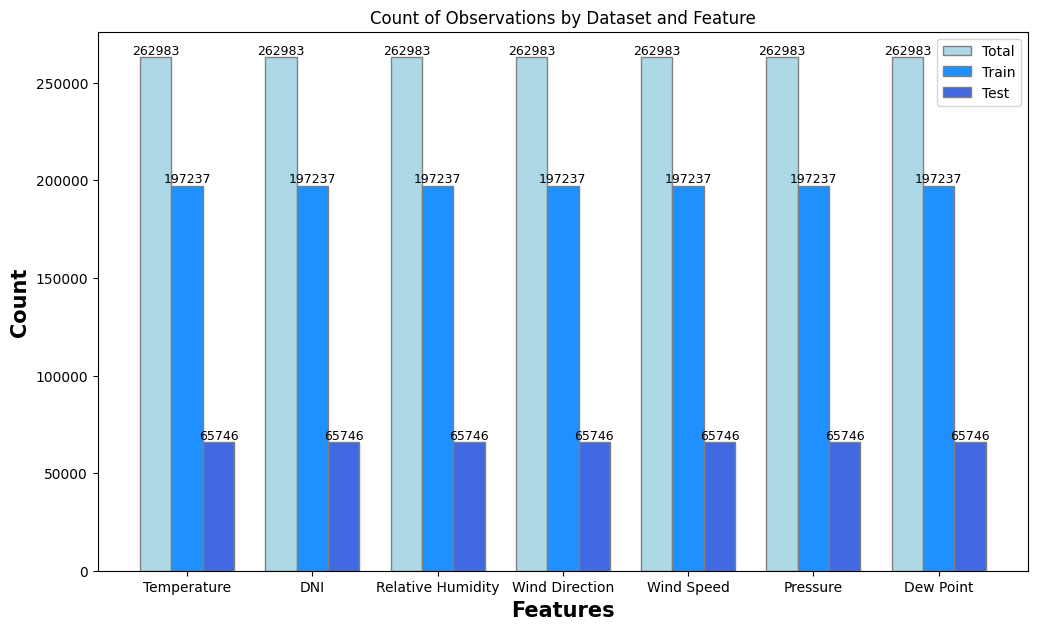

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Features and counts
features = [
    "Temperature",
    "DNI",
    "Relative Humidity",
    "Wind Direction",
    "Wind Speed",
    "Pressure",
    "Dew Point",
]
counts = np.array([262983, 197237, 65746])  # Total, Train, Test

# Bar width and index
barWidth = 0.25
r1 = np.arange(len(features))  # the label locations
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Create bars
fig, ax = plt.subplots(figsize=(12, 7))
bar1 = ax.bar(
    r1,
    counts[0] * np.ones(len(features)),
    color="lightblue",
    width=barWidth,
    edgecolor="grey",
    label="Total",
)
bar2 = ax.bar(
    r2,
    counts[1] * np.ones(len(features)),
    color="dodgerblue",
    width=barWidth,
    edgecolor="grey",
    label="Train",
)
bar3 = ax.bar(
    r3,
    counts[2] * np.ones(len(features)),
    color="royalblue",
    width=barWidth,
    edgecolor="grey",
    label="Test",
)

# Add text on top of the bars
for bars in (bar1, bar2, bar3):
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            yval,
            int(yval),
            va="bottom" if yval < 0 else "bottom",
            ha="center",
            color="black",
            fontsize=9,
        )

# Adding labels and title
ax.set_xlabel("Features", fontweight="bold", fontsize=15)
ax.set_ylabel("Count", fontweight="bold", fontsize=15)
ax.set_xticks([r + barWidth for r in range(len(features))])
ax.set_xticklabels(features)
ax.set_title("Count of Observations by Dataset and Feature")
ax.legend()

plt.show()

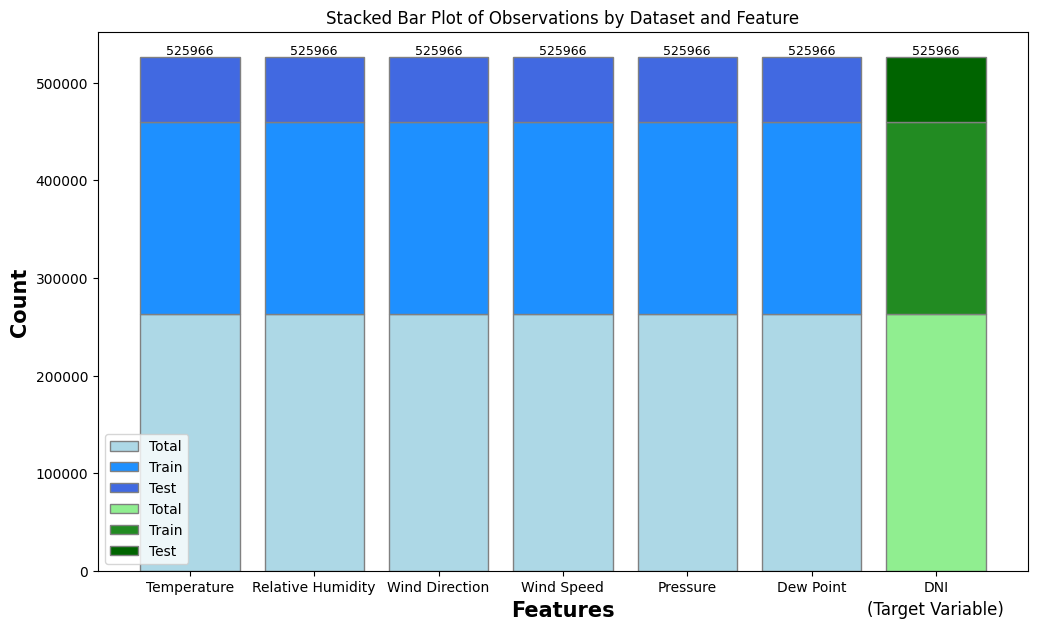

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Features and their counts
features = [
    "Temperature",
    "Relative Humidity",
    "Wind Direction",
    "Wind Speed",
    "Pressure",
    "Dew Point",
    "DNI",
]
counts = [262983, 197237, 65746]  # Total, Train, Test

# Create bars
fig, ax = plt.subplots(figsize=(12, 7))

# Stacking bars for the first six features
for i in range(6):
    ax.bar(
        i,
        counts[0],
        color="lightblue",
        edgecolor="grey",
        label="Total" if i == 0 else "",
    )
    ax.bar(
        i,
        counts[1],
        bottom=counts[0],
        color="dodgerblue",
        edgecolor="grey",
        label="Train" if i == 0 else "",
    )
    ax.bar(
        i,
        counts[2],
        bottom=np.array(counts[:2]).sum(),
        color="royalblue",
        edgecolor="grey",
        label="Test" if i == 0 else "",
    )

# Stacking bars for the 'DNI' feature with a different color
i = 6  # Index for the 'DNI' feature
ax.bar(i, counts[0], color="lightgreen", edgecolor="grey", label="Total")
ax.bar(
    i, counts[1], bottom=counts[0], color="forestgreen", edgecolor="grey", label="Train"
)
ax.bar(
    i,
    counts[2],
    bottom=np.array(counts[:2]).sum(),
    color="darkgreen",
    edgecolor="grey",
    label="Test",
)

# Adding labels and title
ax.set_xlabel("Features", fontweight="bold", fontsize=15)
ax.set_ylabel("Count", fontweight="bold", fontsize=15)
ax.set_xticks(np.arange(len(features)))
ax.set_xticklabels(features)
ax.set_title("Stacked Bar Plot of Observations by Dataset and Feature")

# Adding count annotations on the bars
for feature_index in range(len(features)):
    total_count = sum(counts)
    ax.text(
        feature_index,
        total_count,
        str(total_count),
        color="black",
        ha="center",
        va="bottom",
        fontsize=9,
    )

# Labeling 'DNI' as the target variable
ax.text(
    6, -40000, "(Target Variable)", color="black", ha="center", va="center", fontsize=12
)

ax.legend()

plt.show()

In [ ]:
basic_features = [
    "Temperature",
    "Relative Humidity",
    "Wind Direction",
    "Wind Speed",
    "Pressure",
    "Dew Point",
]
square_features = ["Sqrt_Sum_of_Squares"]
pca_features = ["pca_1", "pca_2", "pca_3", "pca_4"]
time_features = [f for f in X.columns if "_temp_" in f]
freq_features = [f for f in X.columns if ("_freq" in f) or ("_pse" in f)]
cluster_features = ["cluster"]

In [ ]:
print("#basic features: ", len(basic_features))
print("#PCA features: ", len(pca_features))
print("#time features: ", len(time_features))
print("#frequency features: ", len(freq_features))
print("#cluster features: ", len(cluster_features))

#basic features:  6
#PCA features:  4
#time features:  14
#frequency features:  77
#cluster features:  1


In [ ]:
features_1 = list(set(basic_features))
features_2 = list(set(basic_features + pca_features))
features_3 = list(set(features_2 + time_features))
features_4 = list(set(features_3 + freq_features + cluster_features))